In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile





train_datagen = ImageDataGenerator(rescale = 1./255.,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip =True,
#                                     rotation_range=20,
                                    vertical_flip=True,
                                    fill_mode='nearest',                     
                                   )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/kaggle/input/cherry-strawberry-peach-soyabean-dataset/Cherry_Strawberry_Peach_Soyabean/Train',
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (120,120))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( '/kaggle/input/cherry-strawberry-peach-soyabean-dataset/Cherry_Strawberry_Peach_Soyabean/Validation',
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (120,120),
                                                          shuffle = False 
                                                    )

Found 9220 images belonging to 10 classes.
Found 2304 images belonging to 10 classes.


In [ ]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3),name="L1"),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu',name="L2"),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu',name="L3"),
#     tf.keras.layers.MaxPooling2D(2,2),
# #     # The fourth convolution
# #     tf.keras.layers.Conv2D(128, (3,3), activation='relu',name="L4"),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu',name="dense1" ),
#     tf.keras.layers.Dense(14, activation='softmax')
# ])

# # Print the model summary
# model.summary()

In [ ]:
# # Initialising the CNN
# cnn = tf.keras.models.Sequential()

# # Step 1 - Convolution
# cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[150,150, 3]))

# # Step 2 - Pooling
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# # Adding a second convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# # Adding a third convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# # Step 3 - Flattening
# cnn.add(tf.keras.layers.Flatten())

# # Step 4 - Full Connection
# cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# # Step 5 - Output Layer
# cnn.add(tf.keras.layers.Dense(units=4, activation='softmax')) 

In [ ]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3),name="L1"),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu',name="L2"),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu',name="L3"),
#     tf.keras.layers.MaxPooling2D(2,2),
# #     # The fourth convolution
# #     tf.keras.layers.Conv2D(128, (3,3), activation='relu',name="L4"),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu',name="dense1" ),
#     tf.keras.layers.Dense(14, activation='softmax')
# ])

# # Print the model summary
# model.summary()

In [ ]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3),name="L1"),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu',name="L2"),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu',name="L3"),
#     tf.keras.layers.MaxPooling2D(2,2),
# #     # The fourth convolution
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu',name="L4"),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu',name="dense1" ),
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Dropout(0.25),
#     # 512 neuron hidden layer
# #     tf.keras.layers.Dense(128, activation='relu',name="dense2" ),
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Dropout(0.25),
    
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

# # Print the model summary
# model.summary()

# Model 1 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D, GlobalMaxPooling2D,Dropout



# model = Sequential()

# model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (64,64,3), name="L1")),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
# model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L2")),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
# model.add(BatchNormalization()),
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L3")),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
# model.add(BatchNormalization()),
# model.add(Dropout(0.2)),
# model.add(Flatten()),
# model.add(Dense(units = 128 , activation = 'relu',name="Dense1")),
# # model.add(Dense(units = 3 , activation = 'softmax'))


# model.add(Dense(4, kernel_regularizer= tf.keras.regularizers.l2(0.01),activation = 'softmax'))
# model.summary()



# Model 2

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D, GlobalMaxPooling2D,Dropout



model = Sequential()

model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (120,120,3), name="L1")),
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
model.add(BatchNormalization()),
# model.add(Dropout(0.1)),


model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L2")),
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
model.add(BatchNormalization()),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L3")),
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
model.add(BatchNormalization()),


model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L4")),
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
model.add(BatchNormalization()),
# model.add(Dropout(0.1)),


# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
# model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L5")),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),
# model.add(Conv2D(1028 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',name="L6")),
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')),



model.add(Flatten()),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),
model.add(Dense(units = 32, activation = 'relu')),


# Prohobitted
model.add(Dense(10, kernel_regularizer= tf.keras.regularizers.l2(0.01),activation = 'softmax'))


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Conv2D)                 (None, 120, 120, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 60, 60, 16)        64        
 Normalization)                                                  
                                                                 
 L2 (Conv2D)                 (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                        

In [6]:
start = time.time()

# Compiling the CNN  # Set the training parameters
# model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer = optimizer ,loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Training the CNN on the Training set and evaluating it on the Test set
callbacks = myCallback()
history = model.fit( train_generator, 
                  validation_data = validation_generator, 
                  epochs = 350,  
                  callbacks=[callbacks]
#                   steps_per_epoch=62,
                  #validation_steps=6
                 )

end = time.time()
elapsed = end - start
print("Total Time:", elapsed)

Epoch 1/350
289/289 [==============================] - 142s 469ms/step - loss: 0.8530 - accuracy: 0.7977 - val_loss: 8.7067 - val_accuracy: 0.0911
Epoch 2/350
289/289 [==============================] - 97s 336ms/step - loss: 0.4770 - accuracy: 0.8902 - val_loss: 0.8650 - val_accuracy: 0.7769
Epoch 3/350
289/289 [==============================] - 99s 345ms/step - loss: 0.3300 - accuracy: 0.9168 - val_loss: 1.1842 - val_accuracy: 0.7674
Epoch 4/350
289/289 [==============================] - 95s 330ms/step - loss: 0.2693 - accuracy: 0.9298 - val_loss: 0.9090 - val_accuracy: 0.8320
Epoch 5/350
289/289 [==============================] - 98s 337ms/step - loss: 0.2468 - accuracy: 0.9351 - val_loss: 2.2152 - val_accuracy: 0.6280
Epoch 6/350
289/289 [==============================] - 97s 333ms/step - loss: 0.2007 - accuracy: 0.9475 - val_loss: 0.2220 - val_accuracy: 0.9210
Epoch 7/350
289/289 [==============================] - 96s 332ms/step - loss: 0.1855 - accuracy: 0.9469 - val_loss: 0.6513 

In [7]:
model.save('V2_99.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

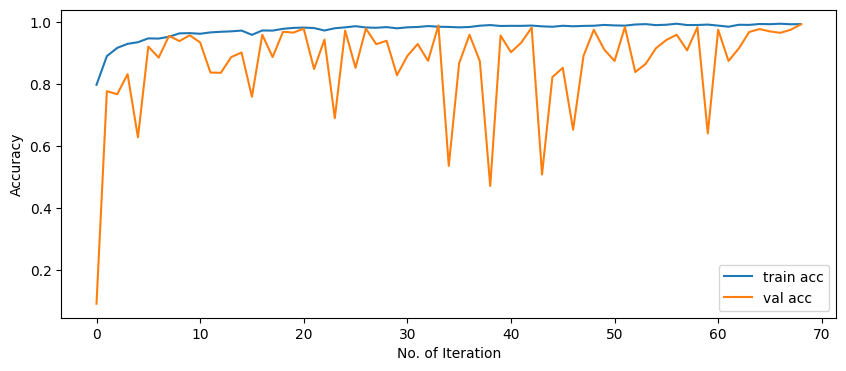

In [9]:
# accuracies
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.ylabel('Accuracy')
plt.xlabel('No. of Iteration')
plt.legend()
plt.savefig('Accuracy')





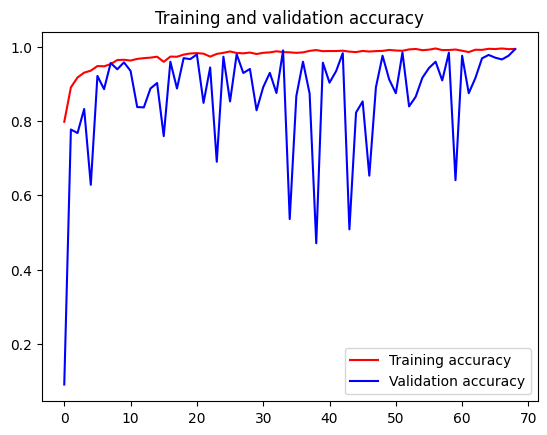

<Figure size 640x480 with 0 Axes>

In [10]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [11]:
#Confution Matrix and Classification Report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
Y_pred = model.predict_generator(validation_generator,2304 //32+1)  #pred_prob

y_pred = np.argmax(Y_pred, axis=1)#orig_test_labels1
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cherry_healthy', 'Cherry_mildew', 'Peach_healthy','Peach_spot','Soybean_Sudden_Death','Soybean_healthy','Strawberry_healthy','Strawberry_scorch','soybean_Yellow_Mosaic','soybean_bacterial_blight']

print(classification_report(validation_generator.classes, y_pred, target_names=target_names  ))   #validation_generator.classes =orig_test_labels1
class_names = ['Cherry_healthy', 'Cherry_mildew', 'Peach_healthy','Peach_spot','Soybean_Sudden_Death','Soybean_healthy','Strawberry_healthy','Strawberry_scorch','soybean_Yellow_Mosaic','soybean_bacterial_blight']
mat= confusion_matrix(validation_generator.classes, y_pred)

/tmp/ipykernel_42/3203081239.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator,2304 //32+1)  #pred_prob


Confusion Matrix
[[ 165    0    0    0    0    6    0    0    0    0]
 [   0  209    0    0    0    1    0    0    0    0]
 [   0    0   70    1    0    1    0    0    0    0]
 [   0    0    0  457    0    1    0    1    0    0]
 [   0    0    0    0   22    0    0    0    0    0]
 [   0    0    1    0    0 1017    0    0    0    0]
 [   0    0    0    0    0    0   91    0    0    0]
 [   0    0    0    1    0    0    0  221    0    0]
 [   0    0    0    0    1    0    0    2   19    0]
 [   0    0    0    0    0    0    0    0    0   17]]
Classification Report
                          precision    recall  f1-score   support

          Cherry_healthy       1.00      0.96      0.98       171
           Cherry_mildew       1.00      1.00      1.00       210
           Peach_healthy       0.99      0.97      0.98        72
              Peach_spot       1.00      1.00      1.00       459
    Soybean_Sudden_Death       0.96      1.00      0.98        22
         Soybean_healthy       0.

In [ ]:
# from sklearn import metrics
# import matplotlib.pyplot as plt
# from itertools import cycle
# from scipy import interp

# score = metrics.accuracy_score(orig_test_labels1, pred)
# print("Accuracy score: {}".format(score))
# pred_prob = final_model.predict(X_test)

In [12]:
import math
number_of_examples = len(validation_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []
test_images = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(validation_generator[i][1]))

for i in range(0,int(number_of_generator_calls)):
    test_images.extend(np.array(validation_generator[i][0]))
    %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
predictions = model.predict_generator(validation_generator)
new_labels = []
for i in range(0,2304):
  new_labels.append(np.argmax(predictions[i]))
newtest_labels = []
for i in range(0,2304):
  newtest_labels.append(np.argmax(test_labels[i]))
cm = confusion_matrix(y_true=newtest_labels, y_pred=new_labels)

/tmp/ipykernel_42/548925538.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [13]:
len(test_images)

2304

Accuracy score: 0.9930555555555556


/tmp/ipykernel_42/3303914805.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_prob = model.predict_generator(validation_generator)


AUC: 0.9999627994675214


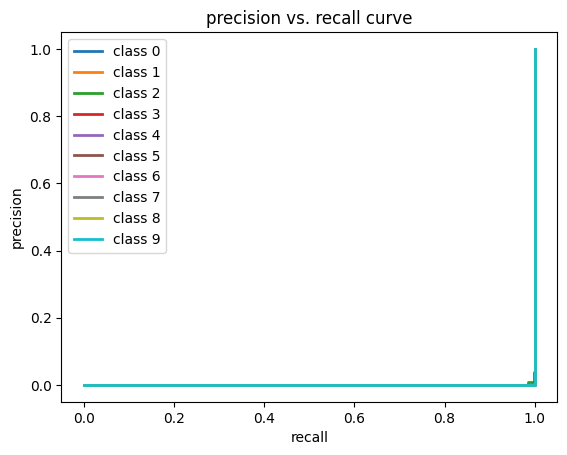

/tmp/ipykernel_42/3303914805.py:44: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


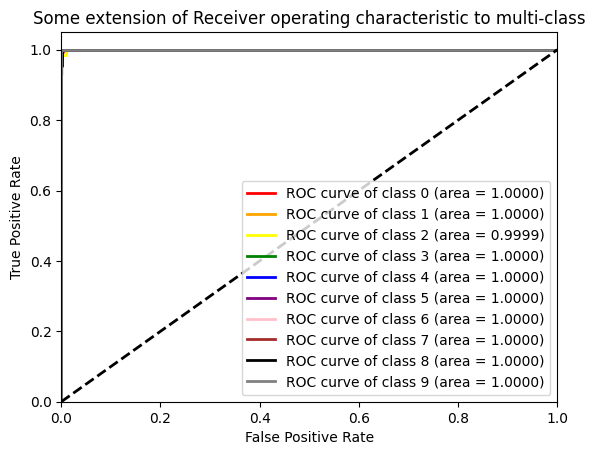

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
score = metrics.accuracy_score(newtest_labels, new_labels)
print("Accuracy score: {}".format(score))
pred_prob = model.predict_generator(validation_generator)

c = roc_auc_score(newtest_labels, pred_prob, multi_class='ovo')
print("AUC:", c)
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
thresh = {}
lw = 2
precision = {}
recall = {}
for i in range(10):  # here need to be modified 
    fpr[i], tpr[i], thresh[i] = roc_curve(newtest_labels, pred_prob[:, i], pos_label=i)
    precision[i], recall[i], _ = roc_curve(newtest_labels, pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))




plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.savefig('PR_CURVE')
plt.show()

n_classes = 10

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'black', 'gray', 'white'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'
                                                       ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()




In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

last_conv_layer_name = "L4"
img_path = "/kaggle/input/cherry-strawberry-peach-soyabean-dataset/Cherry_Strawberry_Peach_Soyabean/Validation/soybean_bacterial_blight/bb (34).bmp"

img_size = (120, 120)



In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Prepare image

img_array = preprocess_input(get_img_array(img_path, size=img_size))
model.layers[-1].activation = None
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.savefig('Heatmap_soybean_bacterial_blight')
plt.show()


In [ ]:
cam = plt.imread(img_path)
def save_and_display_gradcam(img_path, heatmap, cam_path="Superimposed_soybean_bacterial_blight.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [15]:
import math
number_of_examples = len(validation_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []
test_images = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(validation_generator[i][1]))

for i in range(0,int(number_of_generator_calls)):
    test_images.extend(np.array(validation_generator[i][0]))
    %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
predictions = model.predict_generator(validation_generator)
new_labels = []
for i in range(0,2304):
  new_labels.append(np.argmax(predictions[i]))
newtest_labels = []
for i in range(0,2304):
  newtest_labels.append(np.argmax(test_labels[i]))
cm = confusion_matrix(y_true=newtest_labels, y_pred=new_labels)

/tmp/ipykernel_42/548925538.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [16]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

   

Confusion matrix, without normalization
[[ 165    0    0    0    0    6    0    0    0    0]
 [   0  209    0    0    0    1    0    0    0    0]
 [   0    0   70    1    0    1    0    0    0    0]
 [   0    0    0  457    0    1    0    1    0    0]
 [   0    0    0    0   22    0    0    0    0    0]
 [   0    0    1    0    0 1017    0    0    0    0]
 [   0    0    0    0    0    0   91    0    0    0]
 [   0    0    0    1    0    0    0  221    0    0]
 [   0    0    0    0    1    0    0    2   19    0]
 [   0    0    0    0    0    0    0    0    0   17]]


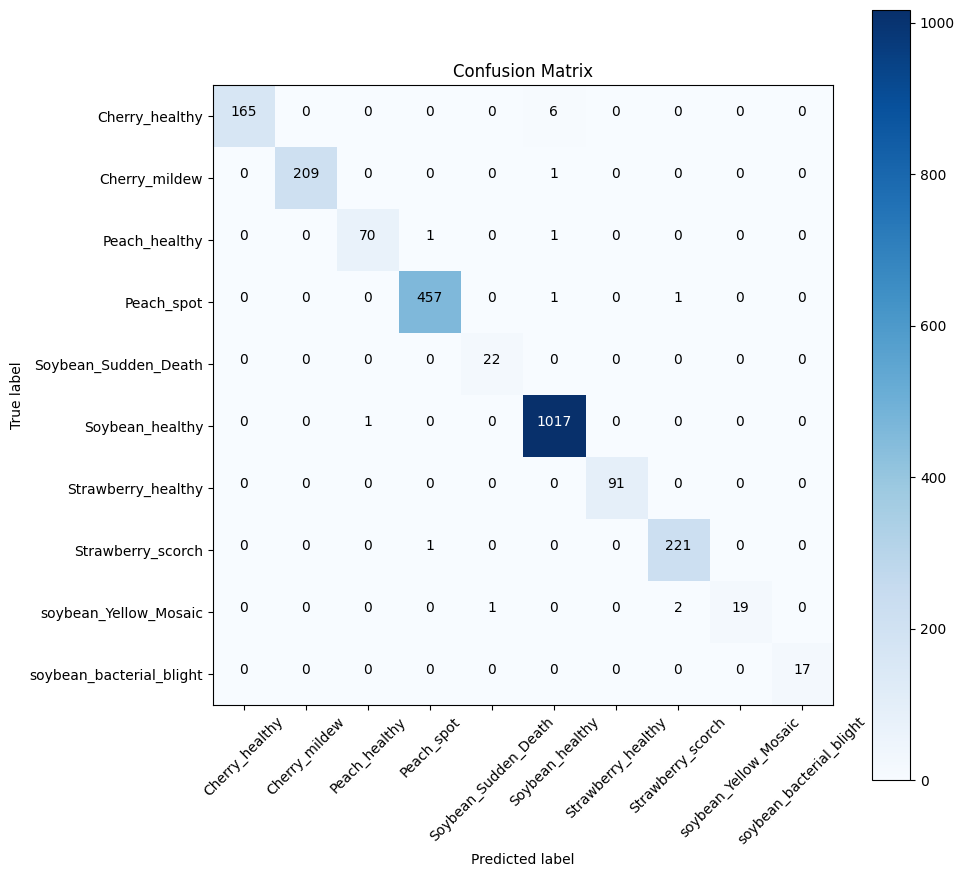

In [17]:
cm_plot_labels =['Cherry_healthy', 'Cherry_mildew', 'Peach_healthy','Peach_spot','Soybean_Sudden_Death','Soybean_healthy','Strawberry_healthy','Strawberry_scorch','soybean_Yellow_Mosaic','soybean_bacterial_blight']
# cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix'  )
plt.savefig('ConfusionMatrix')
